# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, sep=',')
study_results = pd.read_csv(study_results_path, sep=',')

# Combine the data into a single dataset

mouse_study = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="outer")

#mouse_study = mouse_study.sort_values(by = "Timepoint")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study[mouse_study.duplicated(["Mouse ID", 'Timepoint'], keep=False)]
dup_ID = dup_mice['Mouse ID'].unique()
dup_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#dup_mice = mouse_study[mouse_study.duplicated(["Mouse ID", 'Timepoint'], keep=False)]
dup_mice.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_trim = mouse_study.drop(mouse_study.loc[mouse_study['Mouse ID']== str(dup_ID)[2:-2]].index)
mouse_trim.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_trim["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Per_drug_meanC = mouse_trim.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
Per_drug_MedianTV = mouse_trim.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
Per_drug_TVV = mouse_trim.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
Per_drug_TVSD = mouse_trim.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
Per_drug_TVSE = mouse_trim.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

per_drug_ss = pd.DataFrame({ 
                               "Mean Tumor Volume" : Per_drug_meanC,
                               "Median Tumor Volume": Per_drug_MedianTV,
                               "Tumor Volume Variance" : Per_drug_TVV,
                               "Tumor Volume Std. Dev." : Per_drug_TVSD,
                               "Tumor Volume Std. Err.": Per_drug_TVSE})

per_drug_ss

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
per_drug_ss_agg = mouse_trim.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
per_drug_ss_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

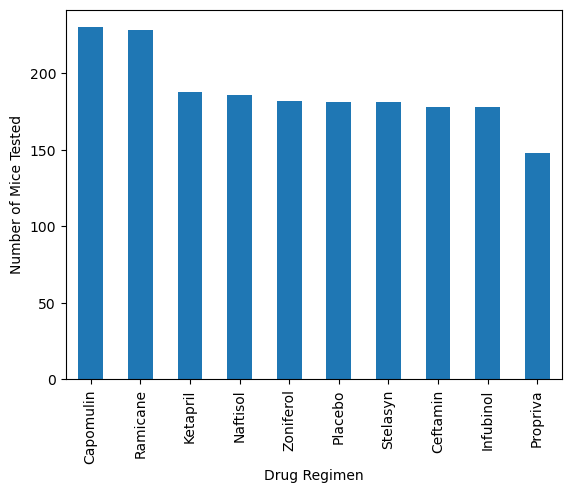

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

micevD = mouse_trim.groupby(["Drug Regimen"]).count()['Timepoint'].sort_values(ascending = False)

micevD_chart= micevD.plot(kind="bar")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()

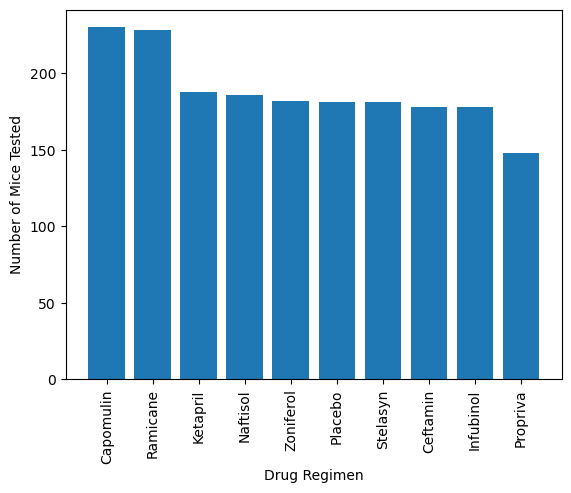

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

micevD = pd.DataFrame ({"Timepoint": micevD})
import numpy as np
x_axis = np.arange(len(micevD))
plt.bar(x_axis, micevD["Timepoint"], align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, micevD.index, rotation='vertical')
plt.show()
plt.tight_layout()

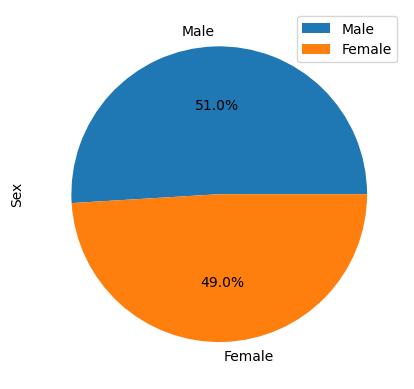

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Smice = mouse_trim.groupby(["Sex"]).agg({"Sex": "size"}).sort_index(ascending=False)
Smice.plot(kind="pie", subplots=True, autopct="%1.1f%%")
plt.show()
plt.tight_layout()

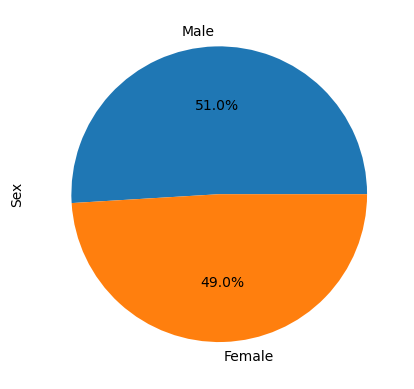

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Smice["Sex"], labels=["Male", "Female"], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxT = mouse_study.groupby(["Mouse ID"]).agg({"Timepoint": "max"})#.rename_axis("Mouse ID",  axis=1)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

maxTV = pd.merge(mouse_study, maxT, on=["Mouse ID", "Timepoint"])
maxTV.drop_duplicates(subset=["Mouse ID"], keep='last')

regfilt = maxTV[maxTV["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].reset_index()
del regfilt['index']
regfilt



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
#DReg = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
DReg = regfilt["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tvd_list = []
tvd = []
for D in DReg:

    tvd_list = regfilt.loc[regfilt["Drug Regimen"] == D, "Tumor Volume (mm3)"]
    tvd.append(tvd_list)
    Dlist = regfilt.loc[regfilt["Drug Regimen"] == D, "Drug Regimen"]
    Dlist = str(Dlist.drop_duplicates(keep='last').values)[2:-2]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tvd_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    loutliers  = [b for b in tvd_list if (b <= lower_bound)]
    upoutliers = [c for c in tvd_list if (c >= upper_bound)]
  
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # Determine outliers using upper and lower bounds
    print(f'{Dlist}\'s potential outliers: {str(upoutliers)[1:-1]}   {str(loutliers)[1:-1]}')
    
    

    



Capomulin's potential outliers:    
Infubinol's potential outliers:    36.3213458
Ramicane's potential outliers:    
Ceftamin's potential outliers:    


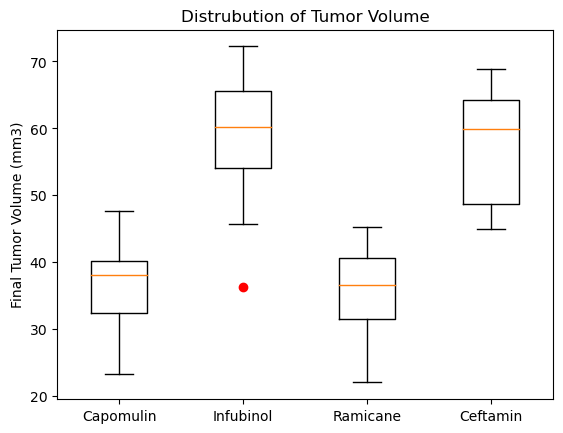

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Distrubution of Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tvd, labels=DReg, sym="r")
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

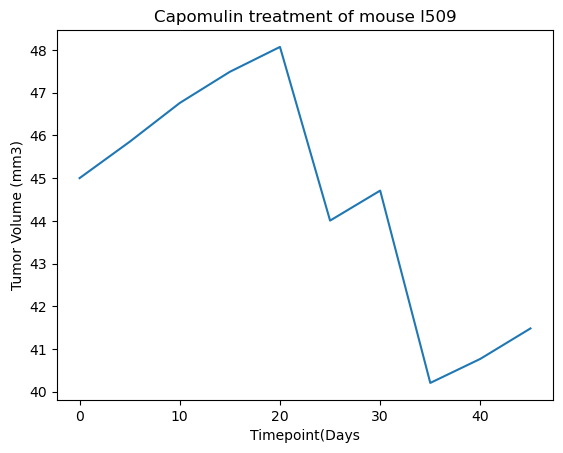

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_ls = mouse_trim[mouse_trim["Drug Regimen"]== "Capomulin"]
Capomulin_m = Capomulin_ls.loc[Capomulin_ls['Mouse ID']== "l509"]

x_axis = np.arange(max(Capomulin_m["Timepoint"]))
plt.plot(Capomulin_m["Timepoint"], Capomulin_m["Tumor Volume (mm3)"])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint(Days')
plt.title('Capomulin treatment of mouse l509')
plt.show

Text(0, 0.5, 'Average Tumor Volume (mm3)')

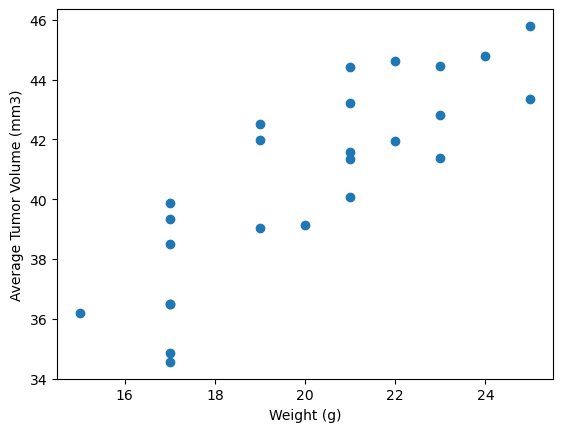

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

meanC = mouse_trim.groupby(["Mouse ID", "Drug Regimen", "Weight (g)"], as_index=False).agg({"Tumor Volume (mm3)": "mean"})
#meanC = pd.merge(mouse_study, meanC, on=["Tumor Volume (mm3)"])
meanC = meanC[meanC["Drug Regimen"]== "Capomulin"]

plt.scatter(meanC["Weight (g)"],meanC["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


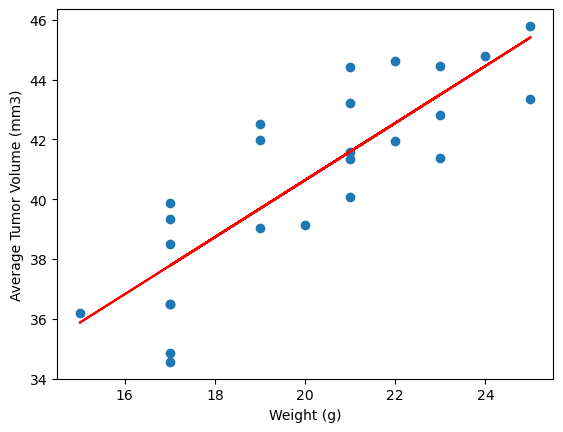

In [83]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(meanC['Weight (g)'],meanC['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(meanC["Weight (g)"],meanC["Tumor Volume (mm3)"])
regress_values=meanC["Weight (g)"]* slope + intercept
plt.scatter(meanC["Weight (g)"],meanC["Tumor Volume (mm3)"])
plt.plot(meanC["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.show()


# Three observations that may be made from the data above:

* The drug regiment tested on the most mice was Capomulin.
* Capomulin and Remicane seemed to suppress the growth of tumors most effectively out of most of the drugs, or the fact that they were the top 2 most used regiments tilted the data in their favor.
* The larger the tumor volume, the more the studied mice weighed, this could indicate that the tumors add significant weight to mice or that heavier mice mice grew larger tumors.





